In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import data
from skimage import exposure
from skimage.transform import match_histograms

In [32]:
fake_img = cv2.imread("/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/unity/image/pocky_108_Scene20_25_original.png")
real_img = cv2.imread("/media/arg_ws3/5E703E3A703E18EB/data/mm_FCN/box_gan/image/pocky_108_Scene20_25_original.png")

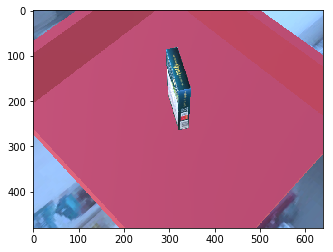

In [33]:
plt.imshow(cv2.cvtColor(fake_img, cv2.COLOR_BGR2RGB))

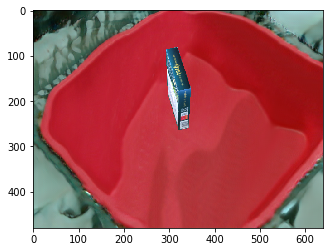

In [34]:
plt.imshow(cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB))

In [35]:
def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

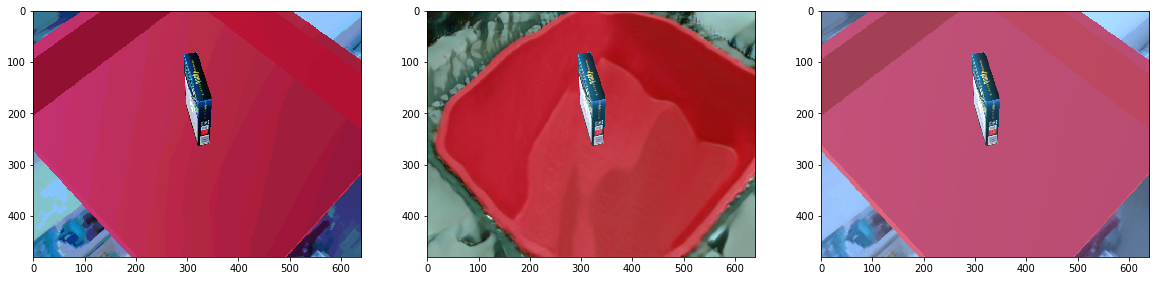

In [36]:
matched = hist_match(fake_img, real_img).astype(np.uint8)
fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1,3,1)
plt.imshow(cv2.cvtColor(matched, cv2.COLOR_BGR2RGB))
fig.add_subplot(1,3,2)
plt.imshow(cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB))
fig.add_subplot(1,3,3)
plt.imshow(cv2.cvtColor(fake_img, cv2.COLOR_BGR2RGB))
plt.show()

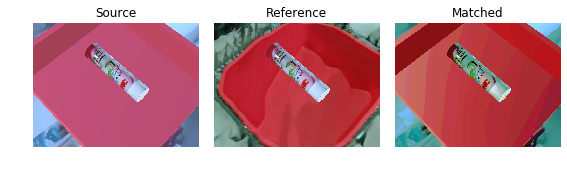

In [31]:
reference = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(fake_img, cv2.COLOR_BGR2RGB)

matched = match_histograms(image, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()